This notebook's sole focus is to find the insights from the metadata file given by SUANfarma

In [99]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [104]:
def udf_describe(df):
    desc_df = df.describe(include = 'all')
    desc_df.loc['dtype'] = df.dtypes
    desc_df.loc['size'] = len(df)
    desc_df.loc['perc_null'] = df.isnull().mean()*100
    return desc_df
    
def udf_drop_duplicate_columns(df):
    duplicate_cols = []
    for i in tqdm(df.columns):
        for j in df.columns:
            if ((str(i) != str(j)) & (df[i].equals(df[j]))):
                if (i not in duplicate_cols):
                    duplicate_cols.append(j)
    print("The following are duplicate columns which will be removed : \n", duplicate_cols)
    return df.drop(columns = duplicate_cols)

def plot_corr(df,size=10):
    # size: vertical and horizontal size of the plot
    corr = df.corr()
    corr = corr.dropna(how = 'all')
    corr = corr.dropna(how = 'all', axis=1)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [91]:
df = pd.read_excel('../../../data/input/11_Dataset/produzione_CStOA_2021_ed12.xlsx', sheet_name="dati-produzione", header=1)
# Remove constants
df.drop(columns = df.loc[:, df.nunique() == 1].columns.values, inplace=True)
# Remove NaN columns
df.dropna(axis=1,how='all', inplace= True)
# Remove rows where id is null
df.dropna(subset=['O.D.P.'], how='all', inplace=True)
df.insert(0, 'id', df['O.D.P.'].astype(int).astype(str).str[-4:])
df.drop(columns= ["N°", "O.D.P."], inplace= True)
print(df.shape)
df = udf_drop_duplicate_columns(df)

(206, 117)


100%|██████████| 117/117 [00:00<00:00, 841.65it/s]

The following are duplicate columns which will be removed : 
 ['6ª  Crist.                 Tag']


In [92]:
cols = df.columns
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('  ', ' ') for w in cols]
cols = [w.replace('Pc n°', 'PCN') for w in cols]
cols = [w.replace(' (', '(') for w in cols]
cols = [w.replace(') ', ')') for w in cols]
cols = [w.replace('( ', '(') for w in cols]
cols = [w.replace(' )', ')') for w in cols]
cols = [w.replace(' ', '_') for w in cols]
cols = [w.replace('.', '') for w in cols]
cols = [w.replace('ª', '') for w in cols]
cols = [w.replace('°', '') for w in cols]
cols = [w.replace('__', '_') for w in cols]
df.columns = cols

In [98]:
df_desc = udf_describe(df).T
df_desc.loc[df_desc['perc_null'] > 10].shape

/var/folders/6s/f25fqpzn1y55r8yt0d82xjlr0000gn/T/ipykernel_26544/3682048969.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc_df = df.describe(include = 'all')


(33, 16)

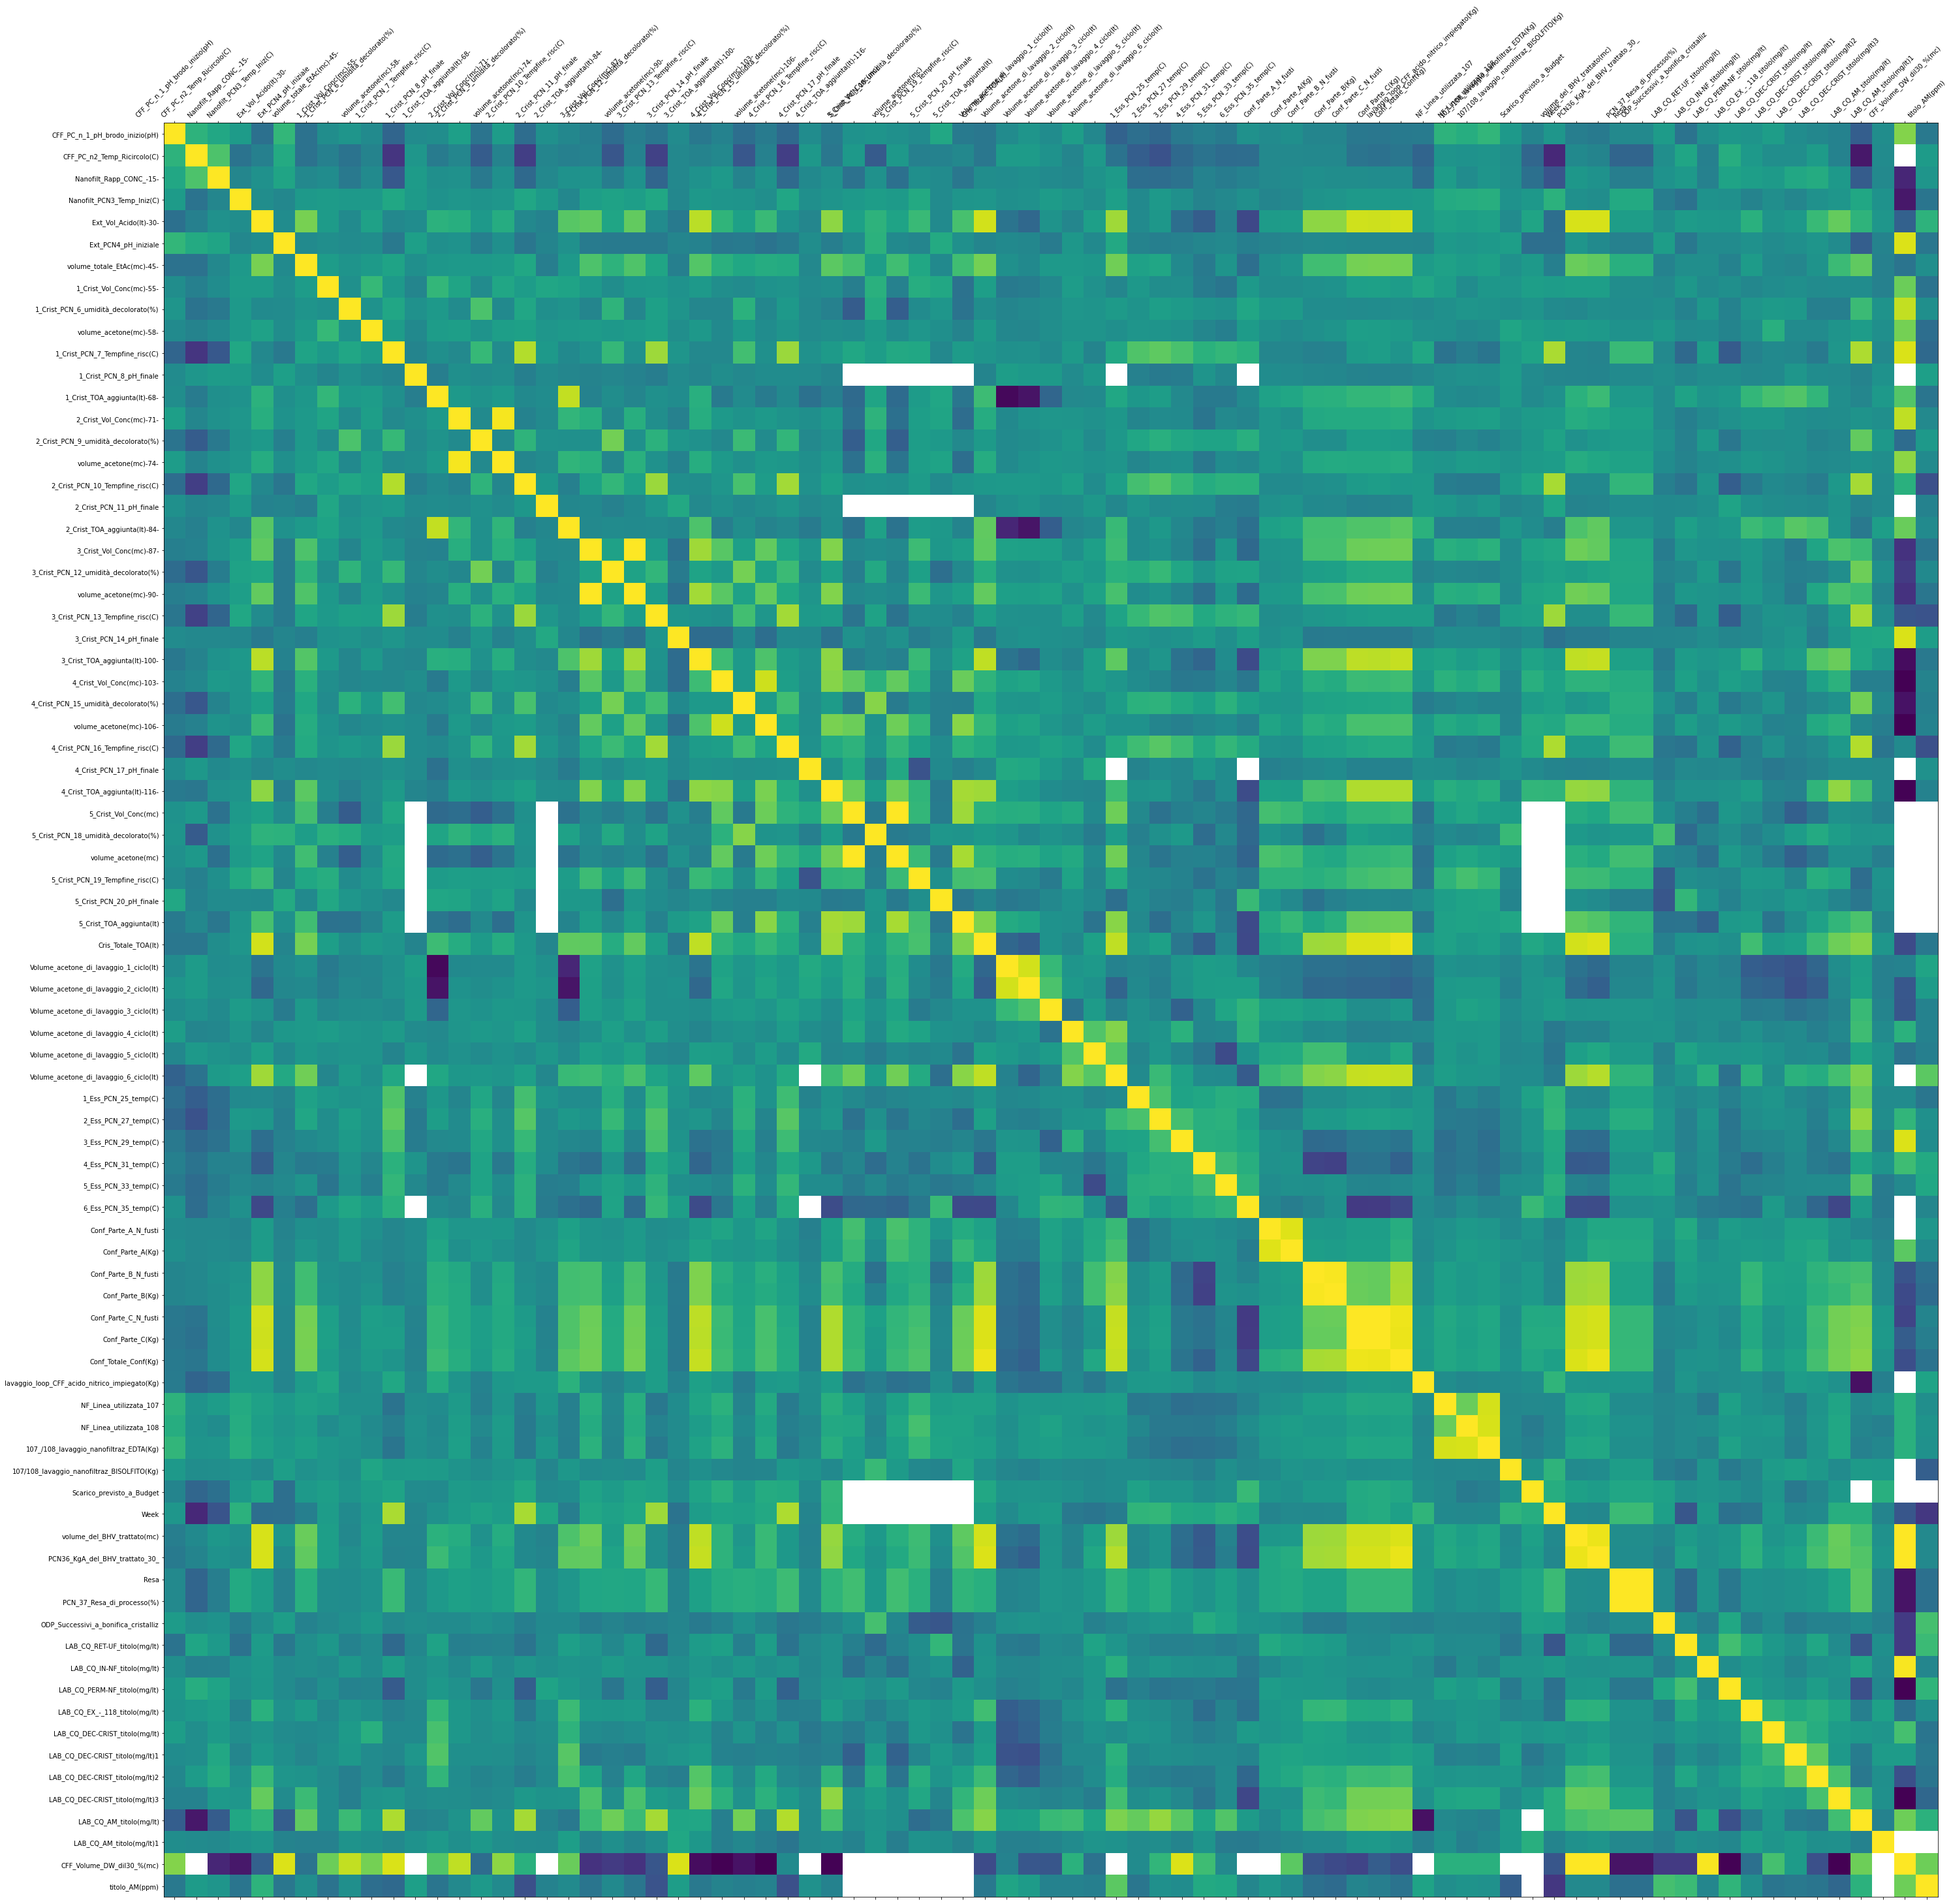

In [106]:
plot_corr(df, 50)